# Hotel Booking Cancellation Prediction

This notebook performs an exploratory data analysis (EDA) to understand the factors influencing hotel booking cancellations.

## 1. Data Loading and Preparation

This section focuses on loading the dataset and preparing it for analysis by performing necessary data cleaning and feature engineering steps.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("first inten project.csv")

# Step 2: Drop unnecessary columns
df.drop(columns=["Booking_ID"], inplace=True)

df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


## 2. Feature Engineering

This section focuses on creating new features from existing ones and encoding categorical variables to make them suitable for analysis and modeling.

In [ ]:
# Step 3: Rename columns for clarity
df.rename(columns={
    "number of adults": "adults",
    "number of children": "children",
    "number of weekend nights": "weekend_nights",
    "number of week nights": "week_nights",
    "type of meal": "meal_type",
    "car parking space": "car_parking",
    "room type": "room_type",
    "lead time": "lead_time",
    "market segment type": "market_type",
    "repeated": "is_repeated",
    "P-C": "cancelled_times",
    "P-not-C": "not_cancelled_times",
    "average price": "avg_price",
    "special requests": "special_requests",
    "date of reservation": "reservation_date",
    "booking status": "booking_status"
}, inplace=True)

df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,average price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
# Step 4: Encode the target column (booking status: 1 = Canceled, 0 = Not Canceled)
df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})
df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,average price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,1
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,1


In [ ]:
# Step 5: Convert reservation_date to datetime
df["reservation_date"]= pd.to_datetime(df["reservation_date"], errors='coerce')
df.head()

,adults,children,weekend_nights,week_nights,meal_type,car_parking,room_type,lead_time,market_type,is_repeated,cancelled_times,not_cancelled_times,average price,special_requests,reservation_date,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,1
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,1


In [ ]:
# Step 6: Extract Year, Month, Day of Week from Date
df["reservation_year"] = df["reservation_date"].dt.year
df["reservation_month"] = df["reservation_date"].dt.month
df["reservation_dayofweek"] = df["reservation_date"].dt.dayofweek

df[["reservation_year", "reservation_month", "reservation_dayofweek"]].head()

,reservation_year,reservation_month,reservation_dayofweek
0,2015.0,10.0,4.0
1,2018.0,11.0,1.0
2,2018.0,2.0,2.0
3,2017.0,5.0,5.0
4,2018.0,4.0,2.0


In [ ]:
# Step 7: Encode Categorical Columns (One-Hot Encoding)
# Encode 'meal_type', 'room_type', and 'market_type'
df_encoded = pd.get_dummies(df, columns=["meal_type", "room_type", "market_type"], drop_first=True)

df_encoded.columns[-10:]  # Just to show a preview of new columns

Index(['room_type_Room_Type 2', 'room_type_Room_Type 3',
       'room_type_Room_Type 4', 'room_type_Room_Type 5',
       'room_type_Room_Type 6', 'room_type_Room_Type 7',
       'market_type_Complementary', 'market_type_Corporate',
       'market_type_Offline', 'market_type_Online'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

This section explores the relationships between different features and the booking status through visualizations.

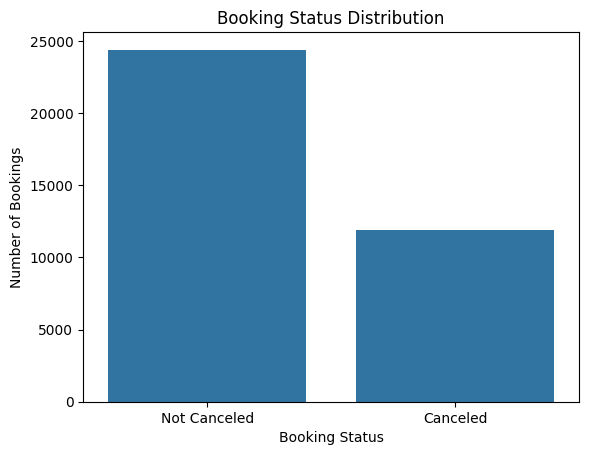

In [ ]:
## EDA

# Step 1: Booking Status Distribution (Target Variable)
sns.countplot(x="booking_status", data=df_encoded)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()

**Insight:** The dataset is imbalanced, with more "Not Canceled" bookings than "Canceled" bookings. This is an important consideration for model training.

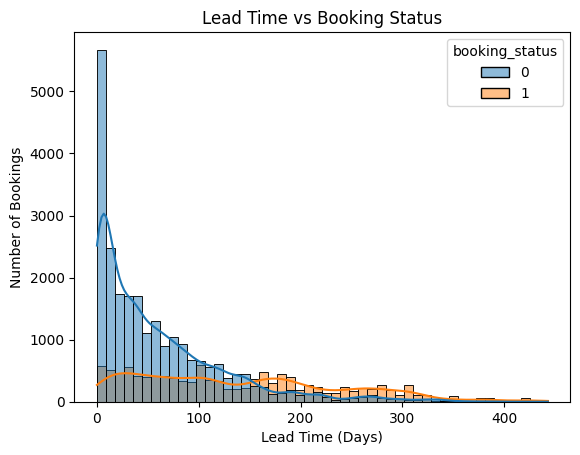

In [ ]:
# Step 2: Impact of Lead Time
sns.histplot(data=df_encoded, x="lead_time", hue="booking_status", kde=True, bins=50)
plt.title("Lead Time vs Booking Status")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.show()

**Insight:** Bookings with longer lead times appear to have a higher tendency to be canceled.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


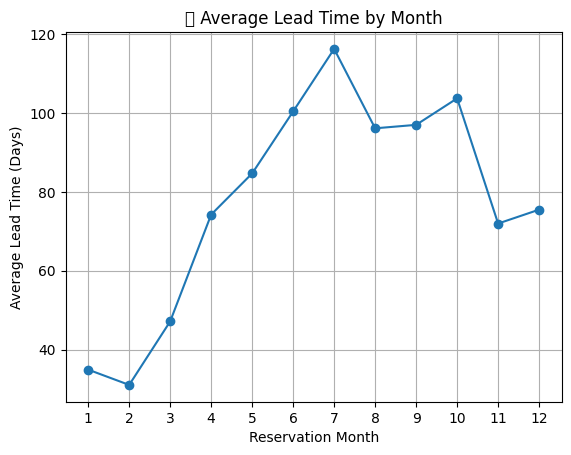

In [ ]:
# Group by month and calculate average lead time
leadtime_by_month = df.groupby("reservation_month")["lead_time"].mean()

# Line plot
leadtime_by_month.plot(kind="line", marker='o')
plt.title("📅 Average Lead Time by Month")
plt.xlabel("Reservation Month")
plt.ylabel("Average Lead Time (Days)")
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

**Insight:** The average lead time varies throughout the year, peaking in certain months.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


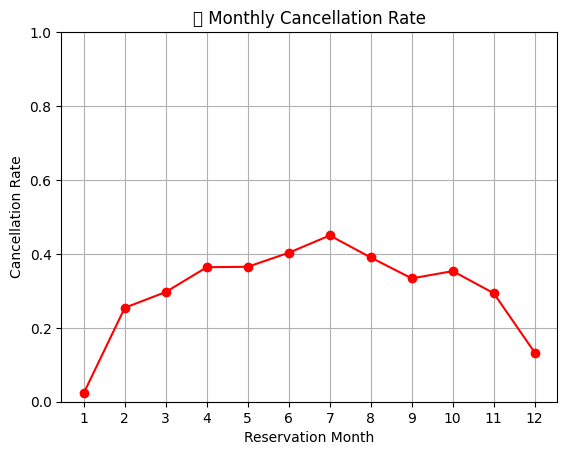

In [ ]:
# Group by month and calculate cancellation rate
monthly_cancel_rate = df.groupby("reservation_month")["booking_status"].mean()

monthly_cancel_rate.plot(kind="line", marker='o', color="red")
plt.title("📉 Monthly Cancellation Rate")
plt.xlabel("Reservation Month")
plt.ylabel("Cancellation Rate")
plt.grid(True)
plt.xticks(range(1,13))
plt.ylim(0, 1)
plt.show()

**Insight:** The cancellation rate shows some seasonality, with higher rates in certain months.

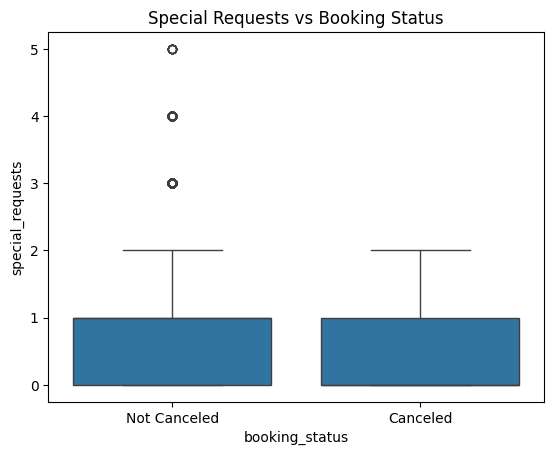

In [ ]:
# Step 3: Special Requests
sns.boxplot(x="booking_status", y="special_requests", data=df_encoded)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title("Special Requests vs Booking Status")
plt.show()

**Insight**: Customers with more special requests are less likely to cancel their bookings.

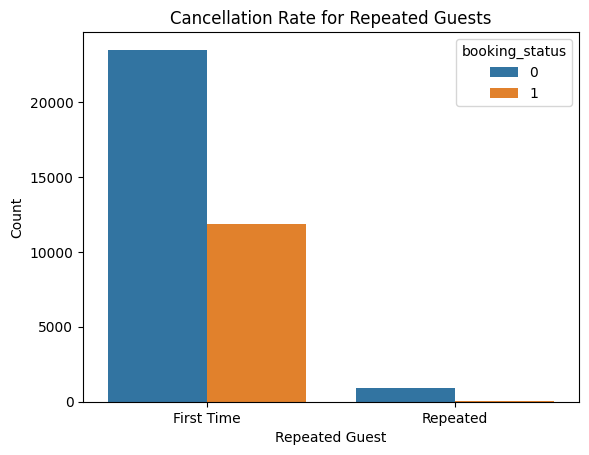

In [ ]:
# Step 4: Repeated Guests
sns.countplot(x="is_repeated", hue="booking_status", data=df_encoded)
plt.xticks([0, 1], ['First Time', 'Repeated'])
plt.title("Cancellation Rate for Repeated Guests")
plt.xlabel("Repeated Guest")
plt.ylabel("Count")
plt.show()

**Insight:** Repeated guests have a significantly lower cancellation rate compared to first-time guests.

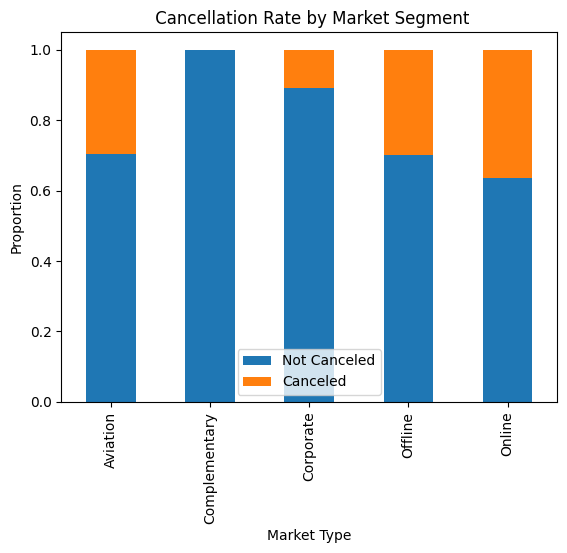

In [ ]:
# Step 5: Market Segment Effect
# Re-import and prepare only the needed columns
df_market = pd.read_csv("first inten project.csv")

# Rename for consistency
df_market.rename(columns={
    "booking status": "booking_status",
    "market segment type": "market_type"
}, inplace=True)

# Encode the target
df_market["booking_status"] = df_market["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

# Group by market_type and calculate normalized value counts
market_counts = df_market.groupby("market_type")["booking_status"].value_counts(normalize=True).unstack()

# Plot
market_counts.plot(kind="bar", stacked=True)
plt.title(" Cancellation Rate by Market Segment")
plt.ylabel("Proportion")
plt.xlabel("Market Type")
plt.legend(["Not Canceled", "Canceled"])
plt.show()

**Insight:** The cancellation rate varies by market segment, with some segments having much higher cancellation rates than others (e.g., Online).

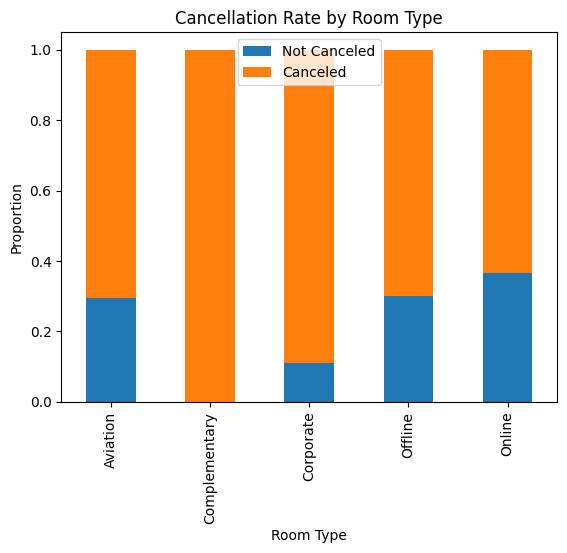

In [ ]:
# Step 6: Room Type & Cancellations


df_room = pd.read_csv("first inten project.csv")
df_room.rename(columns={
    "booking status": "booking_status",
    "market segment type": "room_type"
}, inplace=True)

room_cancel = df_room.groupby("room_type")["booking_status"].value_counts(normalize=True).unstack()
room_cancel.plot(kind="bar", stacked=True)
plt.title("Cancellation Rate by Room Type")
plt.ylabel("Proportion")
plt.xlabel("Room Type")
plt.legend(["Not Canceled", "Canceled"])
plt.show()

**Insight:** Different room types have varying cancellation rates.

/tmp/ipython-input-17-1176276649.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_cancel = df.groupby("price_range")["booking_status"].mean()


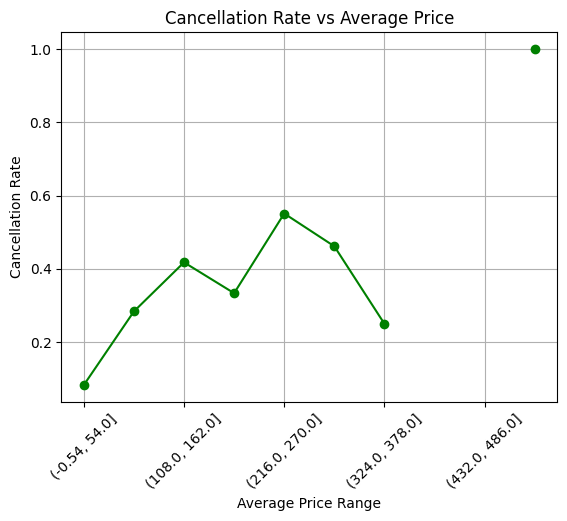

In [ ]:
# Group by average price bins
df["price_range"] = pd.cut(df['average price '], bins=10)

# Calculate cancellation rate per price range
price_cancel = df.groupby("price_range")["booking_status"].mean()

# Plot
price_cancel.plot(kind="line", marker='o', color="green")
plt.title("Cancellation Rate vs Average Price")
plt.xlabel("Average Price Range")
plt.ylabel("Cancellation Rate")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Insight:** The average price seems to have some relationship with the cancellation rate, although it might not be a simple linear relationship.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


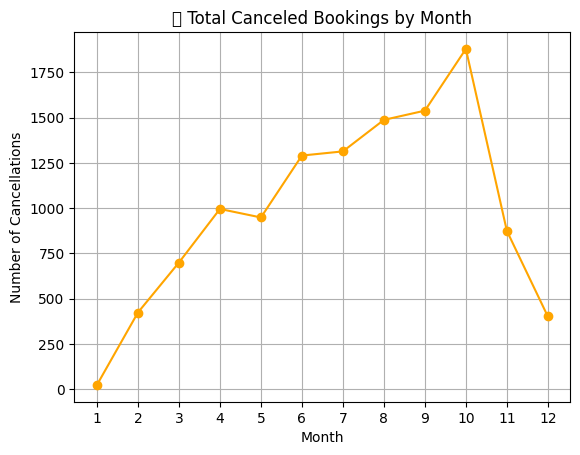

In [ ]:
monthly_cancel = df[df["booking_status"] == 1].groupby("reservation_month").size()

monthly_cancel.plot(kind="line", marker='o', color="orange")
plt.title("📆 Total Canceled Bookings by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

**Insight:** The total number of cancellations also shows a seasonal pattern, aligning with the monthly cancellation rate.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


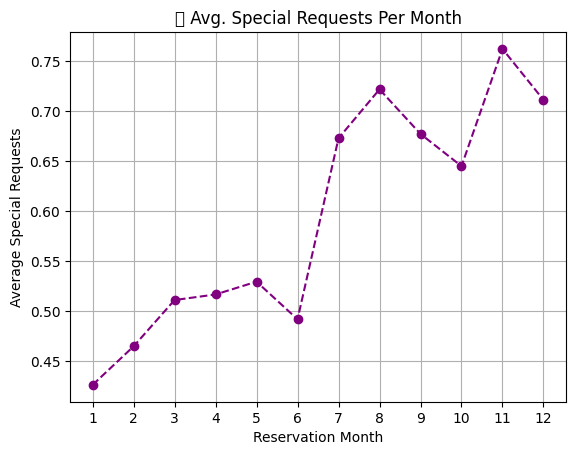

In [ ]:
special_by_month = df.groupby("reservation_month")["special_requests"].mean()

special_by_month.plot(kind="line", marker='o', linestyle='--', color='purple')
plt.title("⭐ Avg. Special Requests Per Month")
plt.xlabel("Reservation Month")
plt.ylabel("Average Special Requests")
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

**Insight:** The average number of special requests also varies by month.

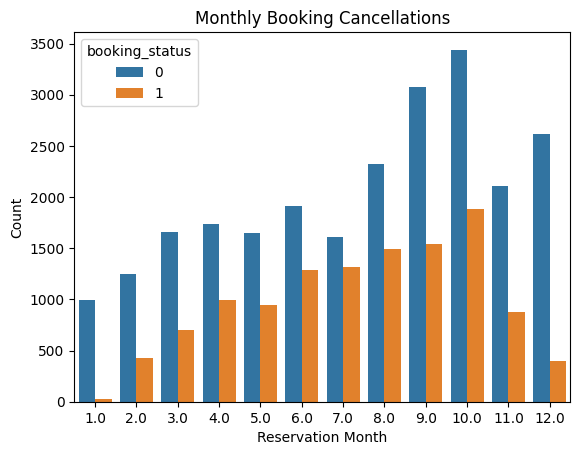

In [ ]:
# Step 7: Seasonality (Month Effect)

sns.countplot(x="reservation_month", hue="booking_status", data=df_encoded)
plt.title("Monthly Booking Cancellations")
plt.xlabel("Reservation Month")
plt.ylabel("Count")
plt.show()

**Insight:** This plot clearly shows the monthly distribution of both canceled and not-canceled bookings, highlighting the months with higher booking activity and cancellations.

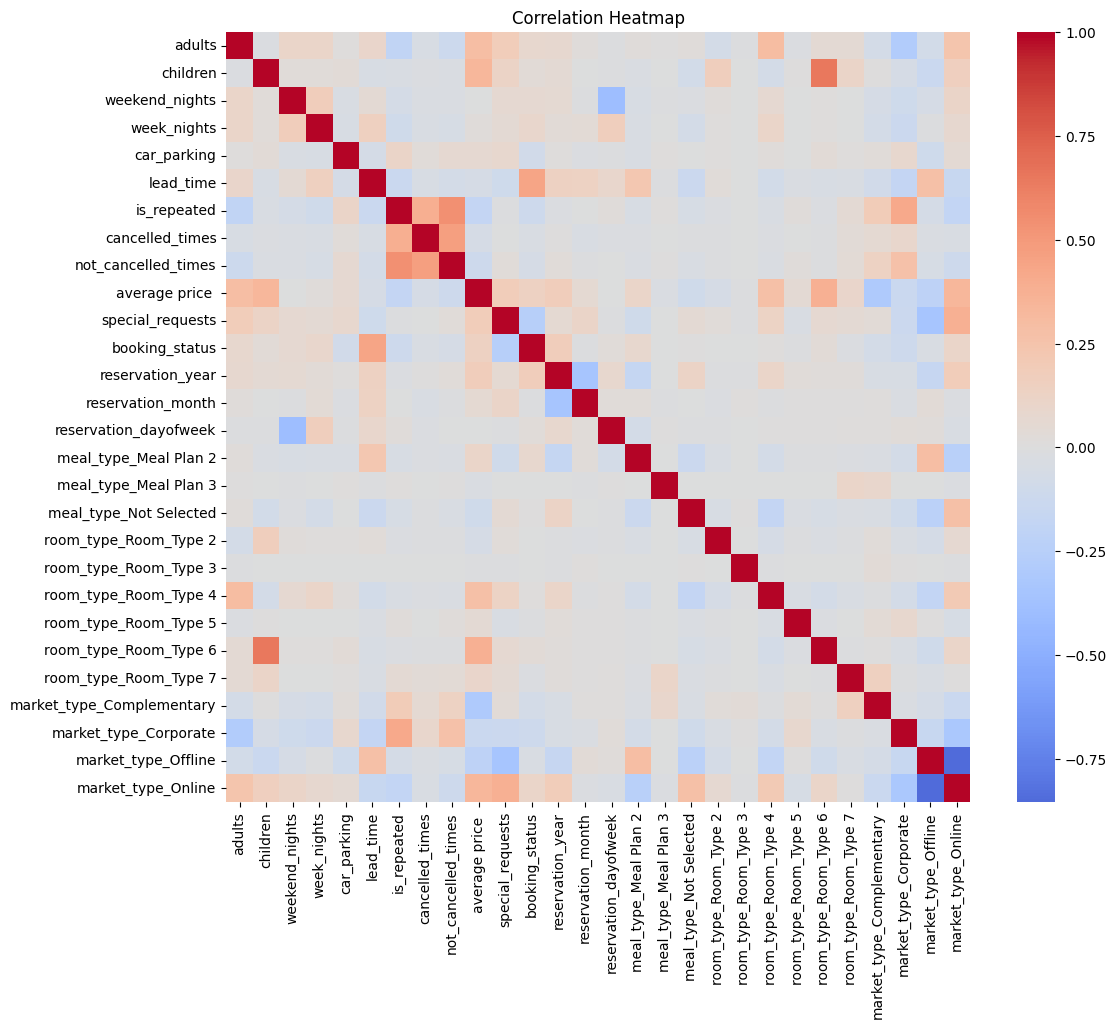

In [ ]:
# Step 8: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

**Insight:** The correlation heatmap helps identify potential relationships between numerical features and the target variable, as well as multicollinearity among features.